# **Gym Members Exercise Dataset**


# **1. Tải dữ liệu**

In [1]:
import pandas as pd
import os
from pathlib import Path

def download_kaggle_dataset(dataset_id, save_dir="datasets", file_name=None):
    dataset_path = Path(save_dir)
    dataset_path.mkdir(parents=True, exist_ok=True)
    os.system(f"kaggle datasets download -d {dataset_id} -p {dataset_path} --unzip")
    if file_name:
        csv_file = dataset_path / file_name
        if csv_file.is_file():
            return pd.read_csv(csv_file)
        else:
            raise FileNotFoundError(f"Không tìm thấy file: {csv_file}")
    return None

# Tải dữ liệu
dataset_id = "valakhorasani/gym-members-exercise-dataset"
file_name = "gym_members_exercise_tracking.csv"
data = download_kaggle_dataset(dataset_id, "datasets/gym_data", file_name)

print("📊 Dataset đã được tải:")
print("Số dòng:", data.shape[0], "Số cột:", data.shape[1])
print(data.head())

📊 Dataset đã được tải:
Số dòng: 973 Số cột: 15
   Age  Gender  Weight (kg)  Height (m)  Max_BPM  Avg_BPM  Resting_BPM  \
0   56    Male         88.3        1.71      180      157           60   
1   46  Female         74.9        1.53      179      151           66   
2   32  Female         68.1        1.66      167      122           54   
3   25    Male         53.2        1.70      190      164           56   
4   38    Male         46.1        1.79      188      158           68   

   Session_Duration (hours)  Calories_Burned Workout_Type  Fat_Percentage  \
0                      1.69           1313.0         Yoga            12.6   
1                      1.30            883.0         HIIT            33.9   
2                      1.11            677.0       Cardio            33.4   
3                      0.59            532.0     Strength            28.8   
4                      0.64            556.0     Strength            29.2   

   Water_Intake (liters)  Workout_Frequency (

# **📊 2. Trực Quan Hóa Dữ Liệu (EDA)**



📌 Thông tin tổng quan về dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequen

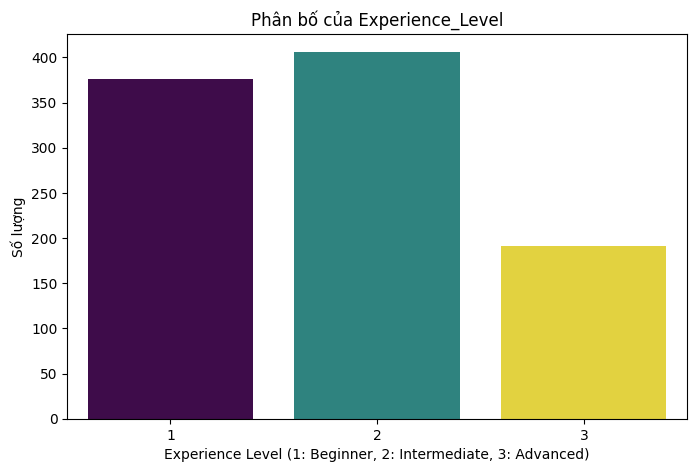

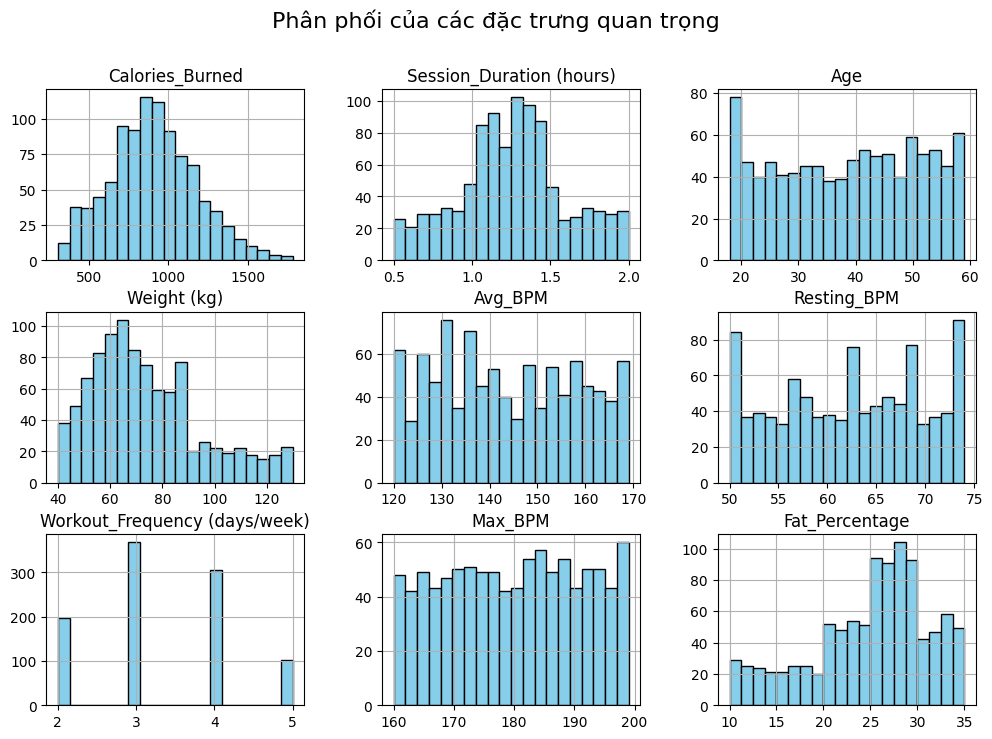

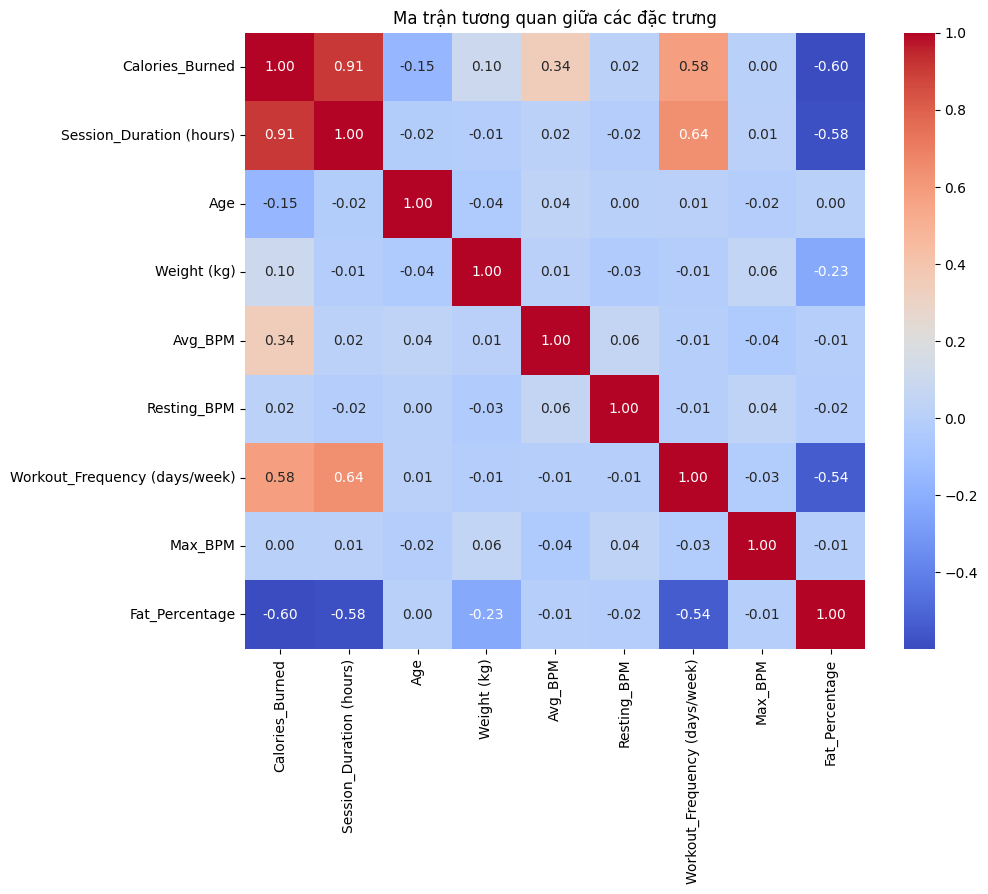

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Thông tin tổng quan
print("\n📌 Thông tin tổng quan về dataset:")
print(data.info())

# Kiểm tra giá trị thiếu
print("\n❓ Số lượng giá trị thiếu trong mỗi cột:")
print(data.isnull().sum())

# Phân bố của Experience_Level
print("\n📊 Phân bố của Experience_Level:")
print(data['Experience_Level'].value_counts())

# Thống kê mô tả
print("\n📈 Thống kê mô tả:")
print(data.describe())

# Trực quan hóa phân bố Experience_Level
plt.figure(figsize=(8, 5))
sns.countplot(x='Experience_Level', hue='Experience_Level', data=data, palette='viridis', legend=False)
plt.title("Phân bố của Experience_Level")
plt.xlabel("Experience Level (1: Beginner, 2: Intermediate, 3: Advanced)")
plt.ylabel("Số lượng")
plt.show()

features = ['Calories_Burned', 'Session_Duration (hours)', 'Age', 'Weight (kg)', 'Avg_BPM', 'Resting_BPM', 
            'Workout_Frequency (days/week)', 'Max_BPM', 'Fat_Percentage']
data[features].hist(figsize=(12, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Phân phối của các đặc trưng quan trọng", fontsize=16)
plt.show()

# Ma trận tương quan
features = ['Calories_Burned', 'Session_Duration (hours)', 'Age', 'Weight (kg)', 'Avg_BPM', 'Resting_BPM', 
            'Workout_Frequency (days/week)', 'Max_BPM', 'Fat_Percentage']
plt.figure(figsize=(10, 8))
sns.heatmap(data[features].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Ma trận tương quan giữa các đặc trưng")
plt.show()

# **3. Xử lý dữ liệu trước khi huấn luyện mô hình**



In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 📌 Kiểm tra dữ liệu gốc

print("\n❗ Kiểm tra giá trị thiếu:")
print(data.isnull().sum())

print("\n📊 Phân bố nhãn ban đầu:")
print(data['Experience_Level'].value_counts())

# 🔹 Chọn đặc trưng và nhãn
features = ['Calories_Burned', 'Session_Duration (hours)', 'Age', 'Weight (kg)', 'Avg_BPM', 'Resting_BPM', 
            'Workout_Frequency (days/week)', 'Max_BPM', 'Fat_Percentage']
X = data[features]
y = data['Experience_Level'] - 1  # Chuyển từ [1, 2, 3] -> [0, 1, 2]

# 🔹 Kiểm tra nhãn sau khi chuyển đổi
print("\n📊 Nhãn sau khi điều chỉnh:", y.unique())

# 🔹 Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# 🔹 Kiểm tra dữ liệu sau khi chuẩn hóa
print("\n🔍 Kiểm tra dữ liệu sau khi chuẩn hóa (5 dòng đầu):")
print(pd.DataFrame(X_scaled, columns=features).head())

print("\n✅ Giá trị tối thiểu & tối đa sau khi chuẩn hóa:")
print("Min:", X_scaled.min(), "| Max:", X_scaled.max())

# 🔹 Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 🔹 Kiểm tra kích thước tập dữ liệu
print("\n📌 Kích thước tập huấn luyện:", X_train.shape)
print("📌 Kích thước tập kiểm tra:", X_test.shape)



❗ Kiểm tra giá trị thiếu:
Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64

📊 Phân bố nhãn ban đầu:
Experience_Level
2    406
1    376
3    191
Name: count, dtype: int64

📊 Nhãn sau khi điều chỉnh: [2 1 0]

🔍 Kiểm tra dữ liệu sau khi chuẩn hóa (5 dòng đầu):
   Calories_Burned  Session_Duration (hours)       Age  Weight (kg)   Avg_BPM  \
0         0.682432                  0.793333  0.926829     0.537264  0.755102   
1         0.391892                  0.533333  0.682927     0.388209  0.632653   
2        

# **4. Huấn luyện mô hình phân loại**

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import time

# Dictionary để lưu mô hình và thời gian huấn luyện
models = {}
train_times = {}

# 4.1 KNN
start_time = time.time()
knn = KNeighborsClassifier()
param_grid_knn = {'n_neighbors': range(1, 21)}
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)
best_knn = grid_search_knn.best_estimator_
train_times['KNN'] = time.time() - start_time
models['KNN'] = best_knn
print(f"🎯 KNN - Siêu tham số tối ưu: {grid_search_knn.best_params_}")

# 4.2 Random Forest
start_time = time.time()
rf = RandomForestClassifier(random_state=42)
param_grid_rf = {'n_estimators': [100, 200], 'max_depth': [10, 20, None], 'min_samples_split': [2, 5]}
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_
train_times['Random Forest'] = time.time() - start_time
models['Random Forest'] = best_rf
print(f"🎯 Random Forest - Siêu tham số tối ưu: {grid_search_rf.best_params_}")

# 4.3 XGBoost
start_time = time.time()
xgb_model = xgb.XGBClassifier(random_state=42, objective='multi:softmax', num_class=3)
param_grid_xgb = {'n_estimators': [100, 200], 'max_depth': [3, 6, 10], 'learning_rate': [0.01, 0.1]}
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)
best_xgb = grid_search_xgb.best_estimator_
train_times['XGBoost'] = time.time() - start_time
models['XGBoost'] = best_xgb
print(f"🎯 XGBoost - Siêu tham số tối ưu: {grid_search_xgb.best_params_}")

🎯 KNN - Siêu tham số tối ưu: {'n_neighbors': 20}
🎯 Random Forest - Siêu tham số tối ưu: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
🎯 XGBoost - Siêu tham số tối ưu: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}


# **5.Đánh giá mô hình**

In [10]:
from sklearn.metrics import accuracy_score, classification_report

# Dictionary để lưu kết quả
results = {}

# Đánh giá từng mô hình
for model_name, model in models.items():
    start_time = time.time()
    y_pred = model.predict(X_test)
    predict_time = time.time() - start_time
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, target_names=['Beginner', 'Intermediate', 'Advanced'])
    
    results[model_name] = {
        'accuracy': accuracy,
        'train_time': train_times[model_name],
        'predict_time': predict_time
    }
    
    print(f"\n🏆 Đánh giá {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print("Báo cáo phân loại:\n", report)

# So sánh và chọn mô hình tốt nhất
best_model_name = max(results, key=lambda k: results[k]['accuracy'])
print(f"\n📊 So sánh hiệu suất các mô hình:")
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f" - Accuracy: {metrics['accuracy']:.4f}")
    print(f" - Thời gian huấn luyện: {metrics['train_time']:.4f} giây")
    print(f" - Thời gian dự đoán: {metrics['predict_time']:.4f} giây")
print(f"\n🏆 Mô hình tốt nhất: {best_model_name} với accuracy {results[best_model_name]['accuracy']:.4f}")


🏆 Đánh giá KNN:
Accuracy: 0.8718
Báo cáo phân loại:
               precision    recall  f1-score   support

    Beginner       0.86      0.81      0.83        78
Intermediate       0.81      0.87      0.84        75
    Advanced       1.00      1.00      1.00        42

    accuracy                           0.87       195
   macro avg       0.89      0.89      0.89       195
weighted avg       0.87      0.87      0.87       195


🏆 Đánh giá Random Forest:
Accuracy: 0.9179
Báo cáo phân loại:
               precision    recall  f1-score   support

    Beginner       0.98      0.81      0.89        78
Intermediate       0.83      0.99      0.90        75
    Advanced       1.00      1.00      1.00        42

    accuracy                           0.92       195
   macro avg       0.94      0.93      0.93       195
weighted avg       0.93      0.92      0.92       195


🏆 Đánh giá XGBoost:
Accuracy: 0.9231
Báo cáo phân loại:
               precision    recall  f1-score   support

    Beg

# **6.Lưu lại mô hình tốt nhất**

In [11]:
import joblib

# Lưu mô hình tốt nhất và scaler
best_model = models[best_model_name]
joblib.dump(best_model, "model/best_experience_level_model.pkl")
joblib.dump(scaler, "model/scaler.pkl")
print("💾 Mô hình tốt nhất và scaler đã được lưu!")

# Dự đoán mẫu mới
new_data = pd.DataFrame([[800, 1.5, 30, 70, 140, 60, 4, 180, 20]], 
                        columns=features)
new_data_scaled = scaler.transform(new_data)
prediction = best_model.predict(new_data_scaled)
level_map = {0: 'Beginner', 1: 'Intermediate', 2: 'Advanced'}
print(f"🚀 Dự đoán cho mẫu mới: {level_map[prediction[0]]}")

💾 Mô hình tốt nhất và scaler đã được lưu!
🚀 Dự đoán cho mẫu mới: Intermediate
